# CMSE 202 Final Project 

#### CMSE 202 Final Honors Project 
### &#9989; Anuj Jadhav
### &#9989; Section_002

# ___Loan Status Prediction___

## Background and Motivation


The Loan Status Prediction dataset gives us insight into how banks decide whether to approve a loan for someone who wants to buy property. It includes details like the applicant's income, education, job status, and more. Our goal is to use this data to build a model that can predict if someone's loan application will be approved or not.

The loan_data.csv file contains all this information, organized into columns like gender, marital status, income, loan amount, and more. Each row represents one person's loan application. We want to use this data to create a system that can quickly and accurately decide if someone should get a loan based on their financial situation and personal details.

## Methodology

The loan dataset was visualized by loading it and cleaning it to remove any rows with missing values. Following this, categorical variables were encoded into binary format using one-hot encoding to prepare the data for analysis. The resulting encoded dataframe represents each categorical variable with binary columns. The 'Dependents' column was converted to numeric format for consistency.

Next, relationships between different variables and the target variable Loan_Status_Y were visualized through exploratory data analysis. Bar plots were used for binary categorical variables, scatter plots for numerical variables, and count plots for ordinal variables like 'Dependents'. The correlation matrix was also examined to identify any correlations between variables.

For modeling purposes, simple linear regression was applied using the Credit_History variable as the predictor. The data was split into training and testing sets, and the regression model was built and evaluated using metrics like R-squared and mean squared error (MSE). Then I used multiple linear regression, incorporating additional predictors such as ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, and other encoded categorical variables. Similarly, the data was split, the multiple regression model was built, and its performance was evaluated.

Continuing with the analysis I also used logistic regression and support vector machine (SVM) models for classification. The data was split into training and testing sets, and these models were trained on the training data and evaluated on the test data using accuracy score and MSE. 

## Results

_(What did you find when you carried out your methods? Some of your code related to
presenting results/figures/data may be replicated from the methods section or may only be present in
this section. All of the plots that you plan on using for your presentation should be present in this
section)_

In [1]:
import pandas as pd
import numpy as np

# Read the CSV file containing loan data into a DataFrame
loan_df = pd.read_csv('loan_data.csv')

# Remove rows with missing values from the DataFrame 
clean_loan_df = loan_df.dropna()

clean_loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [2]:
#List of categorical variable names that will be transformed
categorical_vars = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status', 'Property_Area']

# 'drop_first=True' avoids multicollinearity by dropping the first category in each variable
clean_loan_df_encoded = pd.get_dummies(clean_loan_df, columns=categorical_vars, drop_first=True)


clean_loan_df_encoded

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y,Property_Area_Semiurban,Property_Area_Urban
0,LP001003,1,4583,1508.0,128.0,360.0,1.0,True,True,False,False,False,False,False
1,LP001005,0,3000,0.0,66.0,360.0,1.0,True,True,False,True,True,False,True
2,LP001006,0,2583,2358.0,120.0,360.0,1.0,True,True,True,False,True,False,True
3,LP001008,0,6000,0.0,141.0,360.0,1.0,True,False,False,False,True,False,True
4,LP001013,0,2333,1516.0,95.0,360.0,1.0,True,True,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,3+,5703,0.0,128.0,360.0,1.0,True,True,False,False,True,False,True
377,LP002974,0,3232,1950.0,108.0,360.0,1.0,True,True,False,False,True,False,False
378,LP002978,0,2900,0.0,71.0,360.0,1.0,False,False,False,False,True,False,False
379,LP002979,3+,4106,0.0,40.0,180.0,1.0,True,True,False,False,True,False,False


In [3]:
# Replace the '3+' value in the 'Dependents' column with 3 and convert the column to integers
clean_loan_df_encoded['Dependents'] = clean_loan_df_encoded['Dependents'].replace('3+', 3).astype(int)

# Ensure all values in the 'Dependents' column are numeric
clean_loan_df_encoded['Dependents'] = pd.to_numeric(clean_loan_df_encoded['Dependents'])

# Remove the 'Loan_ID' column from the DataFrame as it is not needed for analysis
clean_loan_df_encoded = clean_loan_df_encoded.drop(['Loan_ID'], axis=1)
clean_loan_df_encoded

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y,Property_Area_Semiurban,Property_Area_Urban
0,1,4583,1508.0,128.0,360.0,1.0,True,True,False,False,False,False,False
1,0,3000,0.0,66.0,360.0,1.0,True,True,False,True,True,False,True
2,0,2583,2358.0,120.0,360.0,1.0,True,True,True,False,True,False,True
3,0,6000,0.0,141.0,360.0,1.0,True,False,False,False,True,False,True
4,0,2333,1516.0,95.0,360.0,1.0,True,True,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,3,5703,0.0,128.0,360.0,1.0,True,True,False,False,True,False,True
377,0,3232,1950.0,108.0,360.0,1.0,True,True,False,False,True,False,False
378,0,2900,0.0,71.0,360.0,1.0,False,False,False,False,True,False,False
379,3,4106,0.0,40.0,180.0,1.0,True,True,False,False,True,False,False


## Results

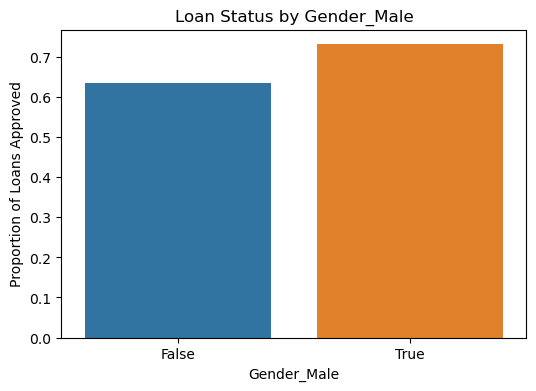

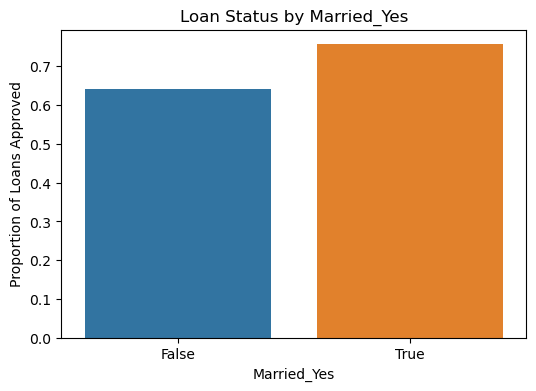

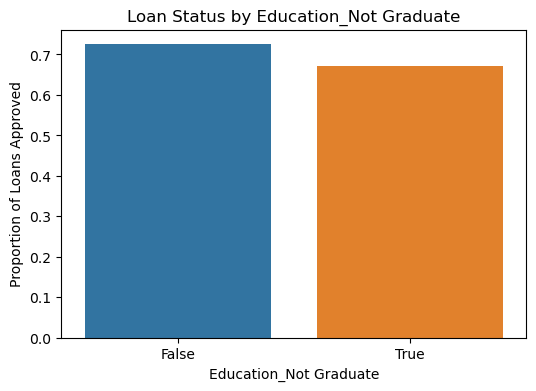

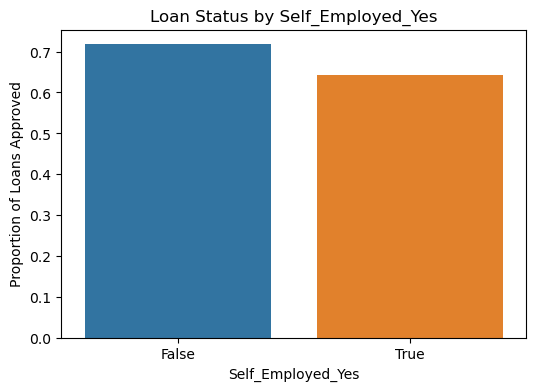

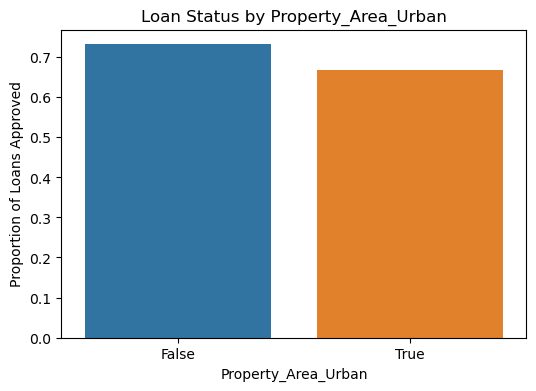

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns

# List of binary categorical variables for analysis
binary_categoricals = ['Gender_Male', 'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes','Property_Area_Urban']
for var in binary_categoricals:
    plt.figure(figsize=(6, 4))
    # Create a bar plot showing the proportion of approved loans for each category
    sns.barplot(x=var, y='Loan_Status_Y', data=clean_loan_df_encoded, errorbar=None)
    plt.title(f'Loan Status by {var}')
    plt.ylabel('Proportion of Loans Approved')
    plt.xlabel(var)
    plt.show()

The proportion of approved loans varies across different binary categorical variables such as Gender, Marital Status, Education, Self-Employment, and Property Area. For example, the proportion of approved loans tends to be higher for males, married individuals, graduates, non-self-employed, and those living in semi-urban areas

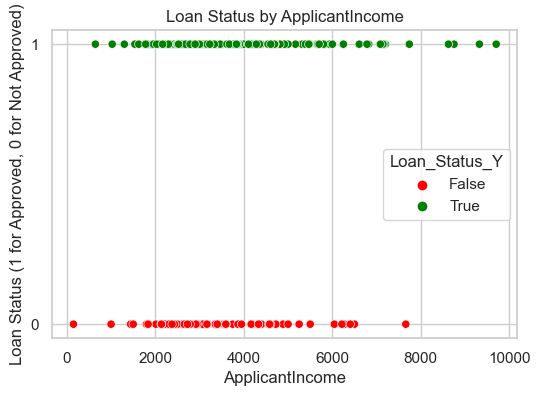

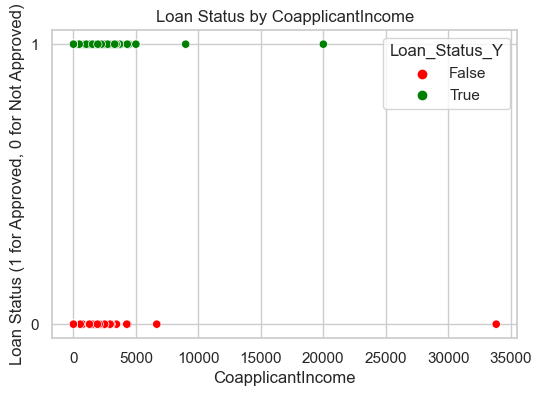

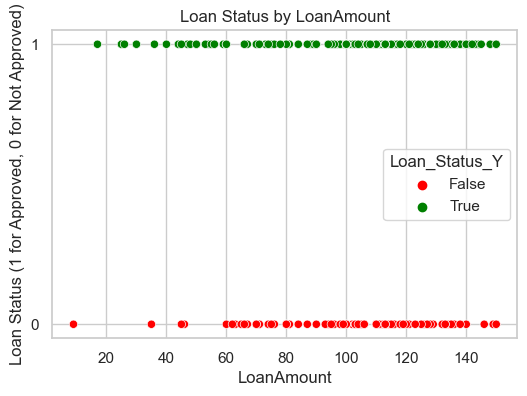

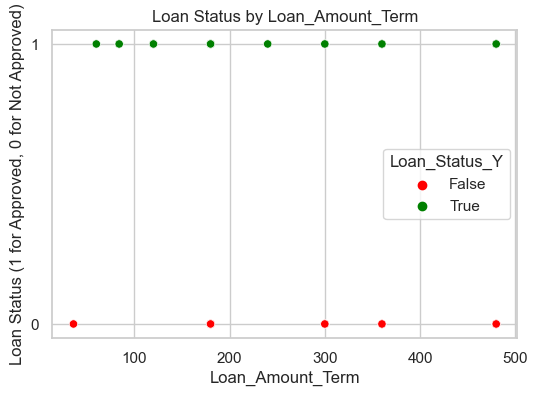

In [29]:
# List of numerical variables to analyze

numericals = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Loop through each numerical variable to create scatter plots
for var in numericals:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=var, y='Loan_Status_Y', data=clean_loan_df_encoded, hue='Loan_Status_Y', palette=['red', 'green'])
    plt.title(f'Loan Status by {var}')
    plt.ylabel('Loan Status (1 for Approved, 0 for Not Approved)')
    plt.xlabel(var)
    plt.yticks([0, 1])
    plt.show()


There seems to be no clear linear relationship between numerical variables (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term) and the loan approval status.Further analysis might be required to explore non-linear relationships 

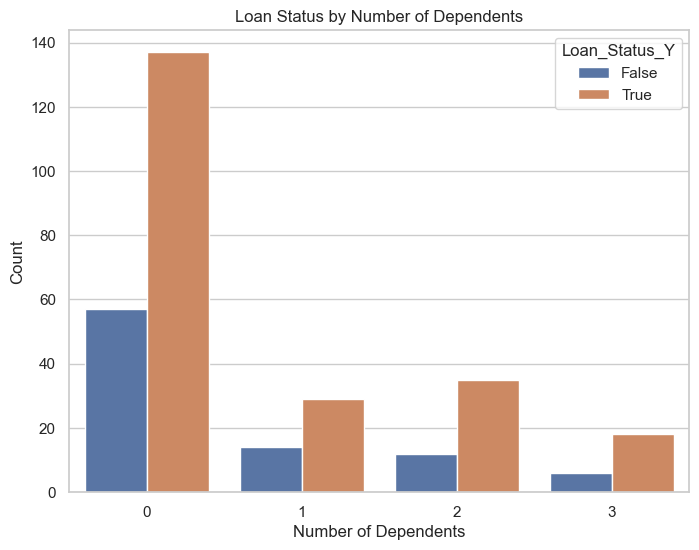

In [30]:
# Create a count plot to show the distribution of loan status across different numbers of dependents

plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', hue='Loan_Status_Y', data=clean_loan_df_encoded)
plt.title('Loan Status by Number of Dependents')
plt.ylabel('Count')
plt.xlabel('Number of Dependents')
plt.show()

The count of loan approvals varies with the number of dependents.It seems that applicants with lower number of dependents have hogher chances of loan approval and applicants with 3 or more dependents have lower instances of approval.

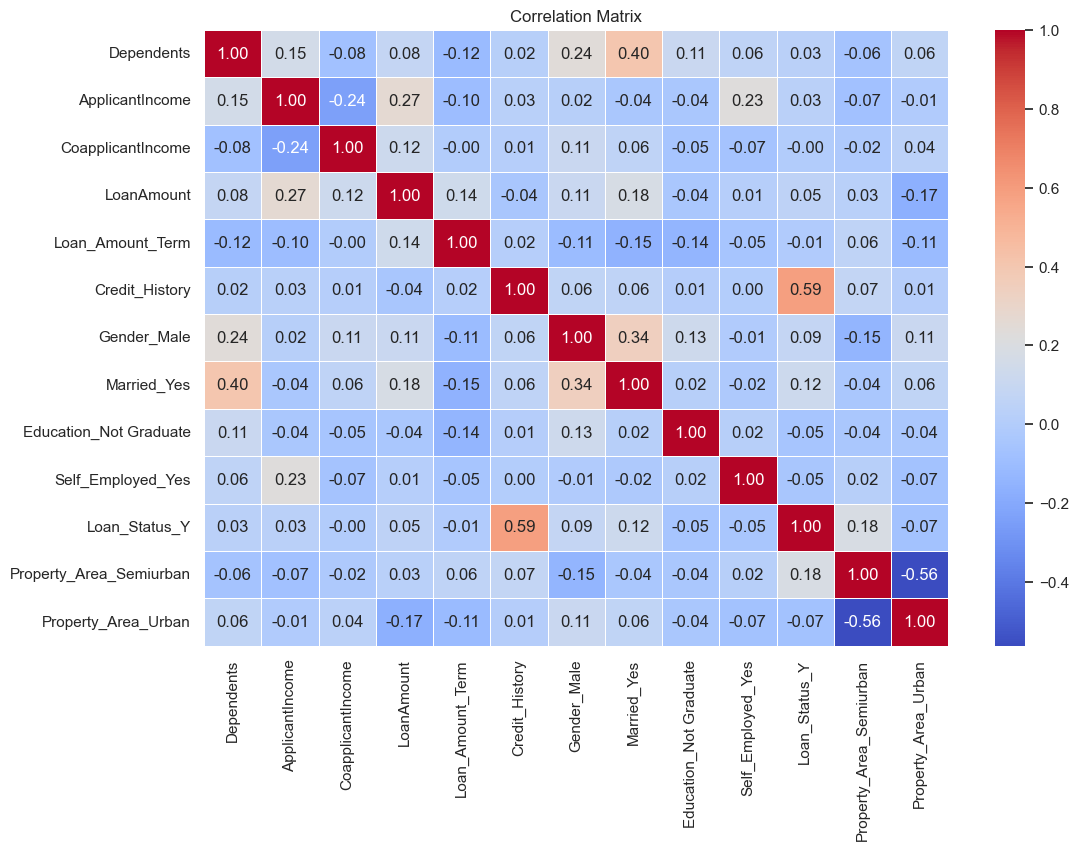

In [7]:
correlation_matrix = clean_loan_df_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [31]:
#Simple Linear Regression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# Select 'Credit_History' as the predictor variable and add a constant to the model
X_simple = clean_loan_df_encoded[['Credit_History']]
y_simple = clean_loan_df_encoded['Loan_Status_Y'] 
X_simple = sm.add_constant(X_simple)

# Split the data into training and testing sets
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)
model_simple = sm.OLS(y_train_simple, X_train_simple).fit()
y_pred_simple = model_simple.predict(X_test_simple)
r_squared_simple = model_simple.rsquared
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)


print("R-squared (Simple Linear Regression):", r_squared_simple)
print("Mean Squared Error (Simple Linear Regression):", mse_simple)


model_simple.summary()


R-squared (Simple Linear Regression): 0.36465677040889544
Mean Squared Error (Simple Linear Regression): 0.16007045494224217


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Loan_Status_Y   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     140.0
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           7.78e-26
Time:                        18:23:32   Log-Likelihood:                -96.417
No. Observations:                 246   AIC:                             196.8
Df Residuals:                     244   BIC:                             203.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0303      0.063      0.484      0.629      -0.093       0.154
Credit_History     0.7960      0.067     11.834      0.000       0.663       0.928
==============================================================================
Omnibus:                       75.726   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.285
Skew:                          -1.686   Prob(JB):                     3.45e-31
Kurtosis:                       4.523   Cond. No.                         5.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#Multiple Regression

clean_loan_df_encoded = clean_loan_df_encoded.apply(pd.to_numeric, errors='coerce')
clean_loan_df_encoded.dropna(inplace=True)

X_multiple = clean_loan_df_encoded.drop(columns=['Loan_Status_Y']) 
# Prepare the predictor variables  by dropping the response variable column
y_multiple = clean_loan_df_encoded['Loan_Status_Y']  

# Add a constant to the predictor variables to include an intercept in the regression model
X_multiple = sm.add_constant(X_multiple)

# Split the data into training and testing sets
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)
model_multiple = sm.OLS(y_train_multiple.astype(float), X_train_multiple.astype(float)).fit()
y_pred_multiple = model_multiple.predict(X_test_multiple.astype(float))
r_squared_multiple = model_multiple.rsquared
mse_multiple = mean_squared_error(y_test_multiple, y_pred_multiple)

print("R-squared (Multiple Regression):", r_squared_multiple)
print("Mean Squared Error (Multiple Regression):", mse_multiple)

model_multiple.summary()


R-squared (Multiple Regression): 0.4007265378193159
Mean Squared Error (Multiple Regression): 0.1607127338313312


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Loan_Status_Y   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     12.98
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           2.77e-20
Time:                        18:24:32   Log-Likelihood:                -89.228
No. Observations:                 246   AIC:                             204.5
Df Residuals:                     233   BIC:                             250.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1519      0.179     -0.850      0.396      -0.504       0.200
Dependents                 -0.0068      0.026     -0.268      0.789      -0.057       0.043
ApplicantIncome           2.61e-06   1.85e-05      0.141      0.888   -3.38e-05     3.9e-05
CoapplicantIncome        1.181e-05   1.48e-05      0.799      0.425   -1.73e-05    4.09e-05
LoanAmount                  0.0005      0.001      0.516      0.607      -0.001       0.002
Loan_Amount_Term        -2.662e-05      0.000     -0.075      0.940      -0.001       0.001
Credit_History              0.7752      0.068     11.404      0.000       0.641       0.909
Gender_Male                 0.0700      0.064      1.101      0.272      -0.055       0.195
Married_Yes                 0.0764      0.055      1.397      0.164      -0.031       0.184
Education_Not Graduate     -0.0293      0.054     -0.543      0.588      -0.136       0.077
Self_Employed_Yes           0.0084      0.084      0.100      0.920      -0.157       0.174
Property_Area_Semiurban     0.1202      0.057      2.105      0.036       0.008       0.233
Property_Area_Urban        -0.0159      0.061     -0.261      0.794      -0.136       0.104
==============================================================================
Omnibus:                       67.276   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.095
Skew:                          -1.539   Prob(JB):                     6.17e-26
Kurtosis:                       4.359   Cond. No.                     3.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# Logistic regression model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error


X = clean_loan_df_encoded.drop('Loan_Status_Y', axis=1)
y = clean_loan_df_encoded['Loan_Status_Y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=1000) 
logreg.fit(X_train, y_train)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  
y_pred = (y_pred_proba >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'MSE: {mse:.2f}')


Accuracy: 0.81
MSE: 0.19


The logistic regression model achieved an accuracy of 0.81 on the test set. This indicates that the model correctly predicts loan approval status for approximately 81% of the cases. The mean squared error of the logistic regression model is approximately 0.19. 

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Prepare the feature and target datasets
X = clean_loan_df_encoded.drop('Loan_Status_Y', axis=1)
y = clean_loan_df_encoded['Loan_Status_Y']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define a pipeline for scaling numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define a pipeline for encoding categorical feature
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Apply the preprocessing transformations to the feature data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
svm_classifier = SVC(kernel='linear', C=10) 
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'SVM Classifier - Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


SVM Classifier - Accuracy: 0.81
              precision    recall  f1-score   support

       False       0.83      0.50      0.62        20
        True       0.80      0.95      0.87        42

    accuracy                           0.81        62
   macro avg       0.82      0.73      0.75        62
weighted avg       0.81      0.81      0.79        62



The SVM classifier achieved an accuracy of 0.81 on the test set, which is similar to the logistic regression model's performance. The classification report provides detailed metrics such as precision, recall, F1-score, and support for each class (approved and not approved loans)

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error


# Define a function to predict loan approval using logistic regression
def predict_loan_approval(applicant_data):
    prediction = logreg.predict(applicant_data)
    return prediction

#  a sample DataFrame for a loan applicant with specific features
sample_applicant_data = pd.DataFrame({
    'Dependents': [1],
    'ApplicantIncome': [4000],
    'CoapplicantIncome': [1000],
    'LoanAmount': [150],
    'Loan_Amount_Term': [360],
    'Credit_History': [1],
    'Gender_Male': [1],
    'Married_Yes': [0],
    'Education_Not Graduate': [0],
    'Self_Employed_Yes': [0],
    'Property_Area_Semiurban': [1],
    'Property_Area_Urban': [0]
})

prediction = predict_loan_approval(sample_applicant_data)
print("Loan approval prediction:",prediction)


Loan approval prediction: [ True]


Using the trained logistic regression model, a sample applicant's data was inputted into the predictive function. The function predicted that the loan will be approved for the given applicant based on the provided features

### References

https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction/data

_(List the source(s) for any data and/or literature cited in your project.  Ideally, this should be formatted using a formal citation format (MLA or APA or other, your choice!).   Multiple free online citation generators are available such as <a href="http://www.easybib.com/style">http://www.easybib.com/style</a>. **Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_